In [1]:
import numpy as np
import torch
import nibabel as nib 
import nilearn as nil
from nilearn import image
from models import Parellel_Renorm_Dynamic,normalize_3d,scale_calculate
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting
from nilearn.maskers import NiftiLabelsMasker
import os
from tqdm import tqdm
#The method to import data
from nilearn import datasets
from scipy.stats import sem
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
#Whether to use cuda or not
use_cuda = torch.cuda.is_available()
device = torch.device('cuda:0') if use_cuda else torch.device('cpu')

colors = ['#F4F1DE','#DF7A5E','#3C405B','#82B29A','#F2CC8E']

In [2]:

#Load all of these data and draw Visulize plots
#loss_array_NIS=np.load('AOMIC_preprocessed_Results/NIS_aal_cut=2_hidden=256_parallel_training=800/Losses_kde.npy')
#EIs_array_NIS=np.load('AOMIC_preprocessed_Results/NIS_aal_cut=2_hidden=256_parallel_training=800/EIs_kde.npy')
CEs_array_NIS=np.load('AOMIC_preprocessed_Results/NIS_aal_cut=2_hidden=256_parallel_training=800/CEs_kde.npy')
#Load all of these data and draw Visulize plots
#CEs_array_NIS_plus1=np.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800/CEs_kde.npy')
CEs_array_NIS_plus1=np.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800_weight=0.5/CEs_kde.npy')
CEs_array_NIS_plus3=np.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=3_training=800/CEs_kde.npy')
CEs_array_NIS_plus7=np.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=7_training=800/CEs_kde.npy')
CEs_array_NIS_plus14=np.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=14_training=800/CEs_kde.npy')
CEs_array_NIS_plus27=np.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=29_training=800/CEs_kde.npy')
CEs_array_NIS_plus52=np.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=58_training=800/CEs_kde.npy')

In [3]:
'''
#Load all of these data and draw Visulize plots
#loss_array_NIS=np.load('AOMIC_preprocessed_Results/NIS_aal_cut=2_hidden=256_parallel_training=800/Losses_kde.npy')
#EIs_array_NIS=np.load('AOMIC_preprocessed_Results/NIS_aal_cut=2_hidden=256_parallel_training=800/EIs_kde.npy')
#CEs_array_NIS=np.load('AOMIC_preprocessed_Results/NIS_aal_cut=2_hidden=256_parallel_training=800_raw/CEs_kde.npy')
CEs_array_NIS=np.load('AOMIC_preprocessed_Results/NIS_aal_cut=2_hidden=256_parallel_training=800_epoches=100000_raw/CEs_kde.npy')
#Load all of these data and draw Visulize plots
#CEs_array_NIS_plus1=np.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800/CEs_kde.npy')
#CEs_array_NIS_plus1=np.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800_raw/CEs_kde.npy')
#CEs_array_NIS_plus1=np.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800_raw_weight=0.001/CEs_kde.npy')
CEs_array_NIS_plus1=np.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800_epoches=100000_raw/CEs_kde.npy')
CEs_array_NIS_plus3=np.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=3_training=800_raw/CEs_kde.npy')
CEs_array_NIS_plus7=np.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=7_training=800_raw/CEs_kde.npy')
CEs_array_NIS_plus14=np.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=14_training=800_raw/CEs_kde.npy')
CEs_array_NIS_plus27=np.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=29_training=800_raw/CEs_kde.npy')
CEs_array_NIS_plus52=np.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=58_training=800_raw/CEs_kde.npy')
'''

"\n#Load all of these data and draw Visulize plots\n#loss_array_NIS=np.load('AOMIC_preprocessed_Results/NIS_aal_cut=2_hidden=256_parallel_training=800/Losses_kde.npy')\n#EIs_array_NIS=np.load('AOMIC_preprocessed_Results/NIS_aal_cut=2_hidden=256_parallel_training=800/EIs_kde.npy')\n#CEs_array_NIS=np.load('AOMIC_preprocessed_Results/NIS_aal_cut=2_hidden=256_parallel_training=800_raw/CEs_kde.npy')\nCEs_array_NIS=np.load('AOMIC_preprocessed_Results/NIS_aal_cut=2_hidden=256_parallel_training=800_epoches=100000_raw/CEs_kde.npy')\n#Load all of these data and draw Visulize plots\n#CEs_array_NIS_plus1=np.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800/CEs_kde.npy')\n#CEs_array_NIS_plus1=np.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800_raw/CEs_kde.npy')\n#CEs_array_NIS_plus1=np.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800_raw_weight=0.001/CEs_kde.npy')\nCEs_array_NIS_plus1=np.load('AOMIC_preproce

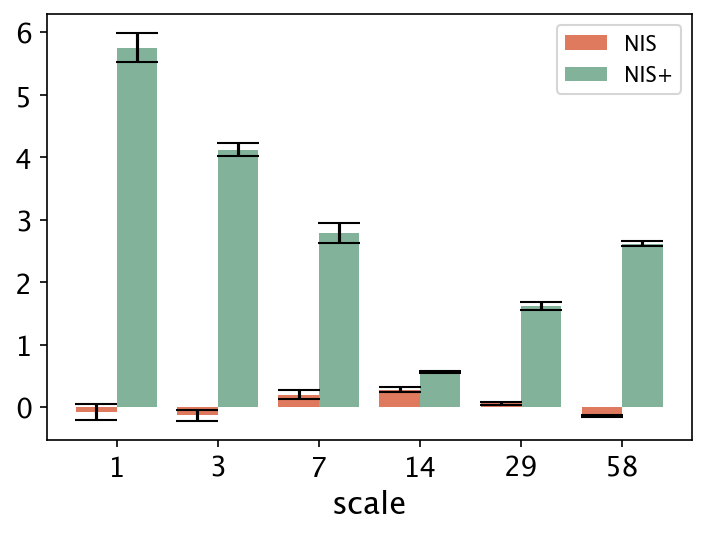

In [4]:
#scale=['52','27','14','7','3','1']
scale=['1','3','7','14','29','58']
CE_mean_NIS=CEs_array_NIS[-20:,1:].mean(0)
CE_std_NIS=CEs_array_NIS[-20:,1:].std(0)
CE_mean_NIS_plus1=CEs_array_NIS_plus1[-10:,1:].mean(0)
CE_std_NIS_plus1=CEs_array_NIS_plus1[-10:,1:].std(0)
CE_mean_NIS_plus3=CEs_array_NIS_plus3[-10:,1:].mean(0)
CE_std_NIS_plus3=CEs_array_NIS_plus3[-10:,1:].std(0)
CE_mean_NIS_plus7=CEs_array_NIS_plus7[-10:,1:].mean(0)
CE_std_NIS_plus7=CEs_array_NIS_plus7[-10:,1:].std(0)
CE_mean_NIS_plus14=CEs_array_NIS_plus14[-10:,1:].mean(0)
CE_std_NIS_plus14=CEs_array_NIS_plus14[-10:,1:].std(0)
CE_mean_NIS_plus27=CEs_array_NIS_plus27[-10:,1:].mean(0)
CE_std_NIS_plus27=CEs_array_NIS_plus27[-10:,1:].std(0)
CE_mean_NIS_plus52=CEs_array_NIS_plus52[-10:,1:].mean(0)
CE_std_NIS_plus52=CEs_array_NIS_plus52[-10:,1:].std(0)

# 创建柱状图
fig, ax = plt.subplots(1, 1, figsize=(5, 4),dpi=150)

# 设置柱状图的位置和宽度
bar_positions = np.arange(6)
bar_width = 0.4

# 使用seaborn库的color_palette函数设置配色
#colors = sns.color_palette('pastel', n_colors=2)

# 画柱状图，将颜色参数设置为colors
bars = ax.bar(bar_positions-0.2, CE_mean_NIS[::-1], width=bar_width, color=colors[1], yerr=CE_std_NIS[::-1], capsize=10)
bars = ax.bar(bar_positions[0]+0.2, CE_mean_NIS_plus1[-1], width=bar_width, color=colors[3], yerr=CE_std_NIS_plus1[-1],capsize=10)
bars = ax.bar(bar_positions[1]+0.2, CE_mean_NIS_plus3[-2], width=bar_width, color=colors[3], yerr=CE_std_NIS_plus3[-2],capsize=10)
bars = ax.bar(bar_positions[2]+0.2, CE_mean_NIS_plus7[-3], width=bar_width, color=colors[3], yerr=CE_std_NIS_plus7[-3],capsize=10)
bars = ax.bar(bar_positions[-3]+0.2, CE_mean_NIS_plus27[2], width=bar_width, color=colors[3], yerr=CE_std_NIS_plus27[2],capsize=10)
bars = ax.bar(bar_positions[-2]+0.2, CE_mean_NIS_plus27[1], width=bar_width, color=colors[3], yerr=CE_std_NIS_plus27[1],capsize=10)
bars = ax.bar(bar_positions[-1]+0.2, CE_mean_NIS_plus52[0], width=bar_width, color=colors[3], yerr=CE_std_NIS_plus52[0],capsize=10)

# 添加坐标轴标签
#ax.set_xlabel('scale',size=14)
#ax.set_ylabel(r'$\mathcal{J}$',size=14)

# 添加刻度标签
plt.tick_params(labelsize=13)
plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)

ax.set_xticks(bar_positions)
ax.set_xticklabels(scale)

plt.legend(['NIS','NIS+'])
plt.xlabel('scale',fontsize=15)
#plt.ylabel(r'$\Delta\mathcal{J}$', fontsize=15)

# 显示图形
plt.show()

In [6]:
#Lode the data and the model
torch.cuda.empty_cache()
data=np.load('Preprocessed_files/AOMIC_preprocessed_aal.npy',allow_pickle=True)
data=normalize_3d(data)
data=torch.tensor(data,device=device).to(torch.float32)
#Make a net
net = Parellel_Renorm_Dynamic(sym_size = data.shape[2], latent_size = 1, effect_size = data.shape[2],
                         cut_size=2, hidden_units = 256, normalized_state = True,device=device)
#Load the net parameters
#net.load_state_dict(torch.load('data/AOMIC_resample_aal_model76000.pkl',map_location=device))
#net.load_state_dict(torch.load('AOMIC_resample_Results/NIS+_aal_cut=2_hidden=256_nonparallel/AOMIC_resample_aal_model_kde56000.pkl',map_location=device))
#net.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800_normalize=False/AOMIC_preprocessed_aal_100_model_kde10000.pkl',map_location=torch.device('cpu')))
#net.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS_aal_cut=2_hidden=256_parallel_training=800_raw/AOMIC_raw_aal_model50000.pkl',map_location=torch.device('cpu')))
#net.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800/AOMIC_preprocessed_aal_model_kde10000.pkl',map_location=torch.device('cpu')))
net.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800_weight=0.5/AOMIC_preprocessed_aal_model_kde10000.pkl',map_location=torch.device('cpu')))
#net.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800_raw/AOMIC_raw_aal_model_kde10000.pkl',map_location=torch.device('cpu')))
#net.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800_raw_weight=0.001/AOMIC_raw_aal_model_kde10000.pkl',map_location=torch.device('cpu')))
#net.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800_epoches=100000_raw/AOMIC_raw_aal_model_kde10000.pkl',map_location=torch.device('cpu')))
#net.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS_aal_cut=2_hidden=256_parallel_training=800_epoches=100000_raw/AOMIC_raw_aal_model50000.pkl',map_location=torch.device('cpu')))

<All keys matched successfully>

In [6]:
#define a predict function
def multi_step_predict(initial,model,steps):
    #initialize the predict data
    predict=torch.zeros([7,116,steps])
    #start the preidction
    state=torch.ones([7,116])*initial
    #loop through different dimensions
    for i in range(7):
        #loop through different steps
        for j in range(steps):
            predicts,latents,lantents_p=model(state[i])
            predict[i,:,j]=predicts[i]
            state[i]=predict[i,:,j]
    #Then we finally return what we want to do 
    return predict

In [7]:
#Then we can use the loaded data for predict
#Pick any person,any region
steps=10
initial_time=np.random.choice(290-steps-1,30,replace=False)

In [8]:

#
net1 = Parellel_Renorm_Dynamic(sym_size = data.shape[2], latent_size = 1, effect_size = data.shape[2],
                         cut_size=2, hidden_units = 256, normalized_state = True,device=device)
#net1.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800/AOMIC_preprocessed_aal_model_kde10000.pkl',map_location=torch.device('cpu')))
net1.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800_weight=0.5/AOMIC_preprocessed_aal_model_kde10000.pkl',map_location=torch.device('cpu')))
#
net3 = Parellel_Renorm_Dynamic(sym_size = data.shape[2], latent_size = 1, effect_size = data.shape[2],
                         cut_size=2, hidden_units = 256, normalized_state = True,device=device)
net3.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=3_training=800/AOMIC_preprocessed_aal_model_kde10000.pkl',map_location=torch.device('cpu')))
#
net7 = Parellel_Renorm_Dynamic(sym_size = data.shape[2], latent_size = 1, effect_size = data.shape[2],
                         cut_size=2, hidden_units = 256, normalized_state = True,device=device)
net7.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=7_training=800/AOMIC_preprocessed_aal_model_kde10000.pkl',map_location=torch.device('cpu')))
#
net14 = Parellel_Renorm_Dynamic(sym_size = data.shape[2], latent_size = 1, effect_size = data.shape[2],
                         cut_size=2, hidden_units = 256, normalized_state = True,device=device)
net14.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=14_training=800/AOMIC_preprocessed_aal_model_kde10000.pkl',map_location=torch.device('cpu')))
#
net29 = Parellel_Renorm_Dynamic(sym_size = data.shape[2], latent_size = 1, effect_size = data.shape[2],
                         cut_size=2, hidden_units = 256, normalized_state = True,device=device)
net29.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=29_training=800/AOMIC_preprocessed_aal_model_kde10000.pkl',map_location=torch.device('cpu')))
#
net58 = Parellel_Renorm_Dynamic(sym_size = data.shape[2], latent_size = 1, effect_size = data.shape[2],
                         cut_size=2, hidden_units = 256, normalized_state = True,device=device)
net58.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=58_training=800/AOMIC_preprocessed_aal_model_kde10000.pkl',map_location=torch.device('cpu')))


<All keys matched successfully>

In [9]:
"""
#
net1 = Parellel_Renorm_Dynamic(sym_size = data.shape[2], latent_size = 1, effect_size = data.shape[2],
                         cut_size=2, hidden_units = 256, normalized_state = True,device=device)
#net1.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS_aal_cut=2_hidden=256_parallel_training=800_raw/AOMIC_raw_aal_model50000.pkl',map_location=torch.device('cpu')))
net1.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800_epoches=100000_raw/AOMIC_raw_aal_model_kde10000.pkl',map_location=torch.device('cpu')))
#net1.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800_raw/AOMIC_raw_aal_model_kde10000.pkl',map_location=torch.device('cpu')))
#net1.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800_raw_weight=0.001/AOMIC_raw_aal_model_kde10000.pkl',map_location=torch.device('cpu')))
#
net3 = Parellel_Renorm_Dynamic(sym_size = data.shape[2], latent_size = 1, effect_size = data.shape[2],
                         cut_size=2, hidden_units = 256, normalized_state = True,device=device)
net3.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=3_training=800_raw/AOMIC_raw_aal_model_kde10000.pkl',map_location=torch.device('cpu')))
#
net7 = Parellel_Renorm_Dynamic(sym_size = data.shape[2], latent_size = 1, effect_size = data.shape[2],
                         cut_size=2, hidden_units = 256, normalized_state = True,device=device)
net7.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=7_training=800_raw/AOMIC_raw_aal_model_kde10000.pkl',map_location=torch.device('cpu')))
#
net14 = Parellel_Renorm_Dynamic(sym_size = data.shape[2], latent_size = 1, effect_size = data.shape[2],
                         cut_size=2, hidden_units = 256, normalized_state = True,device=device)
net14.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=14_training=800_raw/AOMIC_raw_aal_model_kde10000.pkl',map_location=torch.device('cpu')))
#
net29 = Parellel_Renorm_Dynamic(sym_size = data.shape[2], latent_size = 1, effect_size = data.shape[2],
                         cut_size=2, hidden_units = 256, normalized_state = True,device=device)
net29.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=29_training=800_raw/AOMIC_raw_aal_model_kde10000.pkl',map_location=torch.device('cpu')))
#
net58 = Parellel_Renorm_Dynamic(sym_size = data.shape[2], latent_size = 1, effect_size = data.shape[2],
                         cut_size=2, hidden_units = 256, normalized_state = True,device=device)
net58.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=58_training=800_raw/AOMIC_raw_aal_model_kde10000.pkl',map_location=torch.device('cpu')))
"""

"\n#\nnet1 = Parellel_Renorm_Dynamic(sym_size = data.shape[2], latent_size = 1, effect_size = data.shape[2],\n                         cut_size=2, hidden_units = 256, normalized_state = True,device=device)\n#net1.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS_aal_cut=2_hidden=256_parallel_training=800_raw/AOMIC_raw_aal_model50000.pkl',map_location=torch.device('cpu')))\nnet1.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800_epoches=100000_raw/AOMIC_raw_aal_model_kde10000.pkl',map_location=torch.device('cpu')))\n#net1.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800_raw/AOMIC_raw_aal_model_kde10000.pkl',map_location=torch.device('cpu')))\n#net1.load_state_dict(torch.load('AOMIC_preprocessed_Results/NIS+_aal_cut=2_hidden=256_layer=1_training=800_raw_weight=0.001/AOMIC_raw_aal_model_kde10000.pkl',map_location=torch.device('cpu')))\n#\nnet3 = Parellel_Renorm_Dynamic(sym_size

In [10]:
def errors(model,level):
    predict_collection=[]
    for subject in tqdm(range(30)):
        data_sample=data[-subject-1,initial_time[subject]:initial_time[subject]+1,:]
        predict=multi_step_predict(data_sample,model,steps)
        predict_collection.append(predict)
        
    prediction_collection=[predict_collection[i].detach().numpy() for i in range(30)]
    prediction_collection=np.array(prediction_collection)
    #Know the real data
    real=[]
    for subject in range(30):
        real.append(data[-subject-1,initial_time[subject]+1:initial_time[subject]+steps+1,:].detach().numpy().T)
    real=np.array(real)
    error=prediction_collection-real[:,np.newaxis,:,:]
    
    prediction_collection=prediction_collection[:,level,:,:]
    error_collection=np.abs(error[:,level,:,:])
    return real,prediction_collection,error_collection

In [11]:
real,prediction_collection_1,error_collection_1=errors(net1,6)
real,prediction_collection_3,error_collection_3=errors(net3,5)
real,prediction_collection_7,error_collection_7=errors(net7,4)
real,prediction_collection_14,error_collection_14=errors(net14,3)
real,prediction_collection_29,error_collection_29=errors(net29,2)
real,prediction_collection_58,error_collection_58=errors(net58,1)

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [03:14<00:00,  6.47s/it]


In [12]:
errors=np.mean((error_collection_1+error_collection_3
               +error_collection_7+error_collection_14
               +error_collection_29+error_collection_58)/6,(0,1))

'''
std=np.std([np.mean(error_collection_1,(0,1)),
            np.mean(error_collection_3,(0,1)),
            np.mean(error_collection_7,(0,1)),
            np.mean(error_collection_14,(0,1)),
            np.mean(error_collection_27,(0,1)),
            np.mean(error_collection_52,(0,1))],0)


std=np.std((error_collection_1+error_collection_3
               +error_collection_7+error_collection_14
               +error_collection_29+error_collection_58)/6,(0,1))
'''

'\nstd=np.std([np.mean(error_collection_1,(0,1)),\n            np.mean(error_collection_3,(0,1)),\n            np.mean(error_collection_7,(0,1)),\n            np.mean(error_collection_14,(0,1)),\n            np.mean(error_collection_27,(0,1)),\n            np.mean(error_collection_52,(0,1))],0)\n\n\nstd=np.std((error_collection_1+error_collection_3\n               +error_collection_7+error_collection_14\n               +error_collection_29+error_collection_58)/6,(0,1))\n'

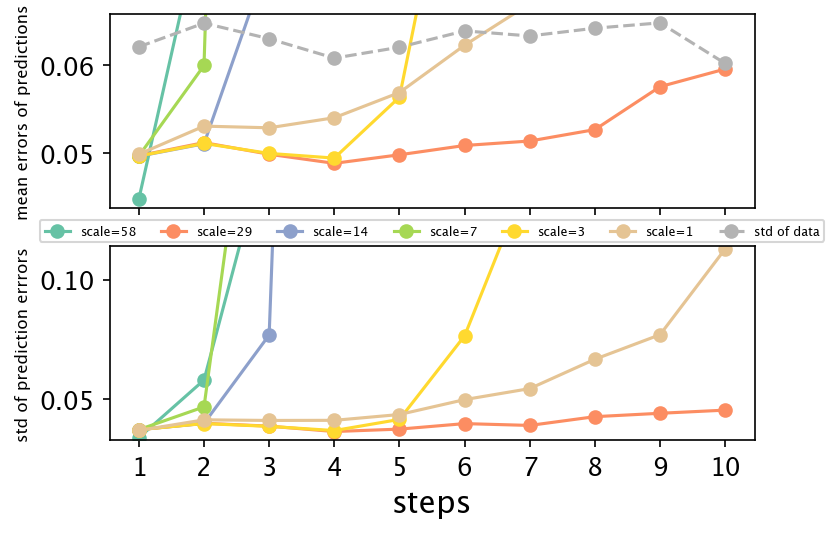

In [13]:
#
cmap=plt.get_cmap('Set2')
colors=cmap(np.linspace(0,1,7))
bar_positions = np.arange(steps)
scale=np.arange(1,steps+1)

#
mean_58=np.mean(error_collection_58,(0,1))
#
mean_29=np.mean(error_collection_29,(0,1))
#
mean_14=np.mean(error_collection_14,(0,1))

#
mean_7=np.mean(error_collection_7,(0,1))
#
mean_3=np.mean(error_collection_3,(0,1))
#
mean_1=np.mean(error_collection_1,(0,1))

#
std=np.std(real,(0,1))
std_1=np.std(error_collection_1,(0,1))
std_3=np.std(error_collection_3,(0,1))
std_7=np.std(error_collection_7,(0,1))
std_14=np.std(error_collection_14,(0,1))
std_29=np.std(error_collection_29,(0,1))
std_58=np.std(error_collection_58,(0,1))

# Create a figure and axis object
fig, ax = plt.subplots(2, 1, figsize=(5, 4),dpi=150,sharex=True)

# Plot the data
ax[0].plot(mean_58,marker='o',c=colors[0],label='scale=58')
ax[0].plot(mean_29,marker='o',c=colors[1],label='scale=29')
ax[0].plot(mean_14,marker='o',c=colors[2],label='scale=14')
ax[0].plot(mean_7,marker='o',c=colors[3],label='scale=7')
ax[0].plot(mean_3,marker='o',c=colors[4],label='scale=3')
ax[0].plot(mean_1,marker='o',c=colors[5],label='scale=1')
ax[0].plot(std,marker='o',linestyle='--',c=colors[6],label='std of data')

ax[1].plot(std_58,marker='o',c=colors[0])
ax[1].plot(std_29,marker='o',c=colors[1])
ax[1].plot(std_14,marker='o',c=colors[2])
ax[1].plot(std_7,marker='o',c=colors[3])
ax[1].plot(std_3,marker='o',c=colors[4])
ax[1].plot(std_1,marker='o',c=colors[5])

'''
#
ax.fill_between(range(len(mean_27)), lower_bound_52, upper_bound_52, alpha=0.1,color=colors[5])
ax.fill_between(range(len(mean_27)), lower_bound_27, upper_bound_27, alpha=0.1,color=colors[1])
ax.fill_between(range(len(mean_27)), lower_bound_14, upper_bound_14, alpha=0.1,color=colors[2])
ax.fill_between(range(len(mean_27)), lower_bound_7, upper_bound_7, alpha=0.1,color=colors[3])
ax.fill_between(range(len(mean_27)), lower_bound_3, upper_bound_3, alpha=0.1,color=colors[4])
ax.fill_between(range(len(mean_27)), lower_bound_1, upper_bound_1, alpha=0.2,color=colors[0])
'''
# 添加刻度标签
ax[0].tick_params(labelsize=12)
ax[1].tick_params(labelsize=12)
plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)

ax[1].set_xticks(bar_positions)
ax[1].set_xticklabels(scale)

ax[0].set_ylabel('mean errors of predictions',fontsize=8)
ax[0].set_ylim([mean_58.min()-1e-3,std.max()+1e-3])

ax[1].set_xlabel('steps',fontsize=15)
ax[1].set_ylabel('std of prediction errrors',fontsize=8)
ax[1].set_ylim([std_58.min()-1e-3,std_1.max()+1e-3])
#plt.yscale('log')
handles, labels = ax[0].get_legend_handles_labels()
#ax[0].legend(['scale=58','scale=29','scale=14','scale=7','scale=3','scale=1','std of data'],loc='lower right',fontsize=6.5)
ax[1].legend(handles,labels,fontsize=6,loc='center',bbox_to_anchor=(0.5,1.08),ncols=7)

plt.show()

In [7]:
def encoding_function_1(input_data):
    return net.encoding(input_data)[-1]

In [8]:
#Since we can can how many number of of ROIs we want to investigate in a large range
dataset = datasets.fetch_atlas_aal()
atlas_filename = dataset.maps
labels = dataset.labels
indices=dataset.indices
description=dataset.description

In [9]:
from captum.attr import IntegratedGradients

In [10]:
#Find out input and target
input=data[:,:-1,:]
target=data[:,1:,:]
#Where we check the integrated gradient
#the data where we check across people
input_mean=input.mean(0)
target_mean=target.mean(0)
#Choose a random time for analysis
time=np.arange(289)
baseline=torch.zeros([116])

In [11]:
ig = IntegratedGradients(encoding_function_1)
attributions, approximation_error = ig.attribute(input_mean,method='gausslegendre',
                                                 return_convergence_delta=True)

In [12]:
atlas_map=nib.load(atlas_filename)

In [13]:
#100 regions
stat_img=np.zeros(atlas_map.get_fdata().shape)
cmap =mcolors.LinearSegmentedColormap.from_list("n_cmap", ['#F4F1DE', '#DF7A5E'])
attributions_normalize=attributions.abs().mean(0)/attributions.abs().mean(0).sum()
for i in range(116):
    index=int(indices[i])
    stat_img[atlas_map.get_fdata()==index]=attributions_normalize[i]

In [14]:
stat_img=nib.Nifti1Image(stat_img,atlas_map.affine)

In [18]:
nib.save(stat_img,'stat_img_aal.nii')

In [22]:
plotting.view_img_on_surf(stat_img,cmap=plt.cm.Reds,vmin=0,symmetric_cmap=False,colorbar=False)

In [23]:
num=8

In [24]:
important_labels=attributions.abs().mean(0).argsort()[-num:].flip(0)
unimportant_labels=attributions.abs().mean(0).argsort()[:num]

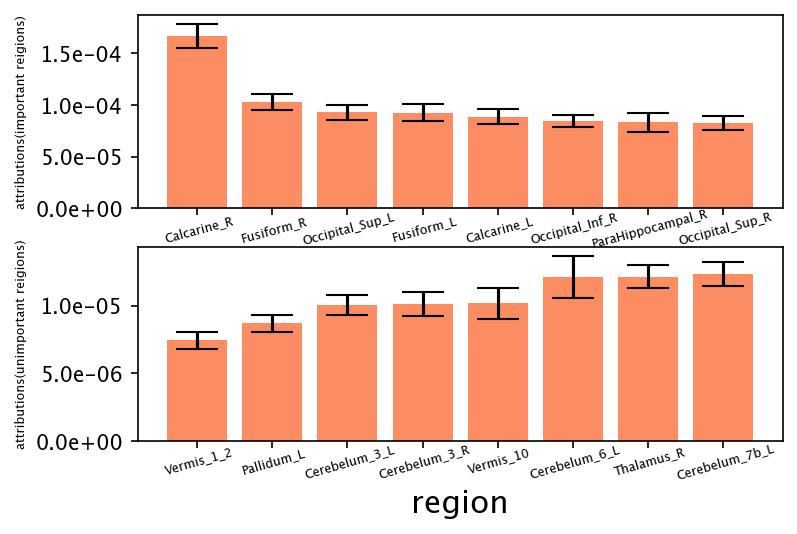

In [25]:
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(2,1, figsize=(5, 4),dpi=150)
ax[0].bar(np.arange(num),attributions.abs().mean(0)[important_labels],color=colors[1],yerr=sem(attributions.abs()[:,important_labels]),capsize=10)
ax[0].set_xticks(np.arange(num),[str(labels[i]) for i in important_labels],wrap=True,size=6,rotation=15)
ax[0].set_ylabel('attributions(important reigions)',fontsize=6)
#plt.title('Important Features(regions) across subjects and time')
#plt.xlabel('features')
#plt.ylabel('attributions')
ax[1].bar(np.arange(num),attributions.abs().mean(0)[unimportant_labels],color=colors[1],yerr=sem(attributions.abs()[:,unimportant_labels]),capsize=10)
ax[1].set_xticks(np.arange(num),[str(labels[i]) for i in unimportant_labels],wrap=True,size=6,rotation=16)
ax[1].set_ylabel('attributions(unimportant reigions)',fontsize=6)
#plt.margins(0.2)
#plt.tick_params(labelsize=13)
plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)
formatter = FormatStrFormatter('%.1e')
ax[0].yaxis.set_major_formatter(formatter)
ax[1].yaxis.set_major_formatter(formatter)
#plt.title('UnImportant Features across subjects and time(regions)')
plt.xlabel('region',fontsize=15)
#plt.ylabel('attributions')
plt.show()

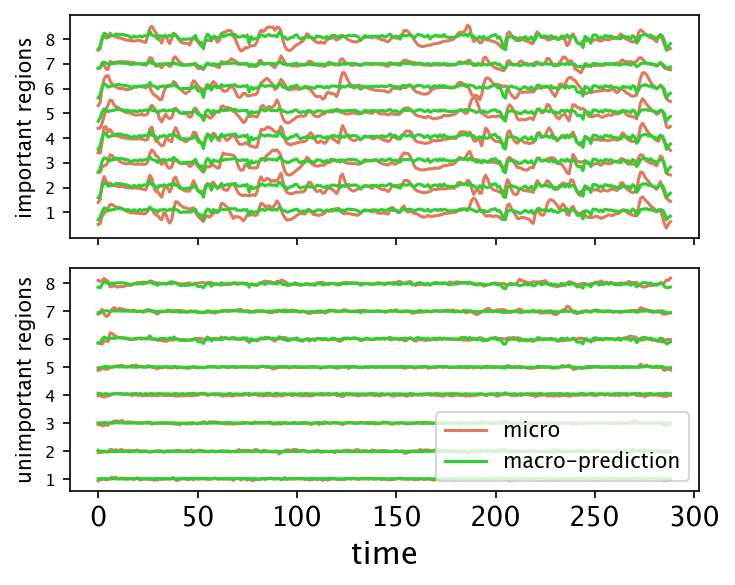

In [32]:
num=8
important_labels=attributions.abs().mean(0).argsort().flip(0)
fig, ax = plt.subplots(2,1, figsize=(5, 4),dpi=150,sharex=True)
colors = ['#F4F1DE','#DF7A5E','#3C405B','#32CD32','#F2CC8E']
#macro=net.encoding(data.mean(0))[-1]
macro=net(data.mean(0))[0][-1]
#macro_normalize=(macro-macro.mean())/macro.std()
#ax.plot(macro_normalize.detach().numpy(),label='macro',linewidth=2)


for i in range(num):
    important_data=data.mean(0)[:,important_labels[i]]
    macro_data=macro[:,important_labels[i]]
    #macro_data=(macro_data-macro_data.mean())/macro_data.std()
    #important_data=(important_data-important_data.mean())/important_data.std()
    ax[0].plot(important_data[1:].detach().numpy()+i*0.12,label='micro',color=colors[1])
    ax[0].plot(macro_data[:-1].detach().numpy()+i*0.12,label='macro',color=colors[3])
    #ax[i,0].set_yticks([])

for i in range(num):
    important_data=data.mean(0)[:,important_labels[-i-1]]
    macro_data=macro[:,important_labels[-i-1]]
    #macro_data=(macro_data-macro_data.mean())/macro_data.std()
    #important_data=(important_data-important_data.mean())/important_data.std()
    ax[1].plot(important_data[1:].detach().numpy()+i*0.12,label='micro',color=colors[1])
    ax[1].plot(macro_data[:-1].detach().numpy()+i*0.12,label='macro',color=colors[3])
    #ax[i,1].set_yticks([])


tick_loc=np.arange(0,0.2+0.12*(num-2),0.12)
nums=np.arange(1,num+1)
#region_labels_important=region_labels[0:num]
#region_labels_important=['I'+str(nums[i]) for i in range(num)]
ax[0].set_yticks(tick_loc)
#ax[0].set_yticklabels(region_labels_important)


#region_labels_unimportant=region_labels[-num:]
#region_labels_unimportant=['U'+str(nums[i]) for i in range(num)]
ax[1].set_yticks(tick_loc)
#ax[1,1].set_yticklabels([])
#ax[1].set_yticklabels(region_labels_unimportant)


ax[0].set_ylabel('important regions',fontsize=10)
ax[1].set_ylabel('unimportant regions',fontsize=10)
 


handles, label = ax[1].get_legend_handles_labels()
"""
# 创建自定义图例项
legend_item1 = mpatches.Patch(color='blue', label='macro')
legend_item2 = mpatches.Patch(color='red', label='micro')
"""

# 将图例项添加到图例中

ax[0].tick_params(labelsize=13)   
ax[1].tick_params(labelsize=13)  

ax[0].set_yticklabels(np.arange(1,num+1),fontsize=8)
ax[1].set_yticklabels(np.arange(1,num+1),fontsize=8)

plt.xlabel('time',fontsize=15)

plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)
#plt.legend(handles=[handles[0],handles[-1]], labels=['micro','macro-prediction'],bbox_to_anchor=(1, -0.3),fontsize=10)
plt.legend(handles=[handles[0],handles[-1]], loc='lower right',labels=['micro','macro-prediction'],fontsize=10)
plt.tight_layout()
plt.show()

In [34]:
'''
plt.plot(data.mean(0)[:,important_labels[:num]].detach().numpy(),color='red')
plt.plot(macro[:,important_labels[:num]].detach().numpy(),color=colors[2])
plt.plot(data.mean(0)[:,important_labels[-num:]].detach().numpy(),color='blue')
plt.plot(macro[:,important_labels[-num:]].detach().numpy(),color=colors[1])
'''

"\nplt.plot(data.mean(0)[:,important_labels[:num]].detach().numpy(),color='red')\nplt.plot(macro[:,important_labels[:num]].detach().numpy(),color=colors[2])\nplt.plot(data.mean(0)[:,important_labels[-num:]].detach().numpy(),color='blue')\nplt.plot(macro[:,important_labels[-num:]].detach().numpy(),color=colors[1])\n"

In [35]:
"""
#Prepare for the macro data
test_data=data[-30:,:,:]
macro=torch.zeros(test_data.shape)
for i in tqdm(range(test_data.shape[0])):
    #
        macro[i,:,:]=net(test_data[i])[0][-1]

num=8
important_labels=attributions.abs().mean(0).argsort().flip(0)
fig, ax = plt.subplots(2,1, figsize=(5, 4),dpi=150,sharex=True)
colors = ['#F4F1DE','#DF7A5E','#3C405B','#32CD32','#F2CC8E']
#macro=net.encoding(data.mean(0))[-1]
#macro=net(data.mean(0))[0][-1]
#macro_normalize=(macro-macro.mean())/macro.std()
#ax.plot(macro_normalize.detach().numpy(),label='macro',linewidth=2)


for i in range(num):
    important_data=test_data.mean(0)[:,important_labels[i]]
    macro_data=macro.mean(0)[:,important_labels[i]]
    #macro_data=(macro_data-macro_data.mean())/macro_data.std()
    #important_data=(important_data-important_data.mean())/important_data.std()
    ax[0].plot(important_data[1:].detach().numpy()+i*0.12,label='micro',color=colors[1])
    ax[0].plot(macro_data[:-1].detach().numpy()+i*0.12,label='macro',color=colors[3])
    #ax[i,0].set_yticks([])

for i in range(num):
    important_data=test_data.mean(0)[:,important_labels[-i-1]]
    macro_data=macro.mean(0)[:,important_labels[-i-1]]
    #macro_data=(macro_data-macro_data.mean())/macro_data.std()
    #important_data=(important_data-important_data.mean())/important_data.std()
    ax[1].plot(important_data[1:].detach().numpy()+i*0.12,label='micro',color=colors[1])
    ax[1].plot(macro_data[:-1].detach().numpy()+i*0.12,label='macro',color=colors[3])
    #ax[i,1].set_yticks([])


tick_loc=np.arange(0,0.2+0.12*(num-2),0.12)
nums=np.arange(1,num+1)
#region_labels_important=region_labels[0:num]
#region_labels_important=['I'+str(nums[i]) for i in range(num)]
ax[0].set_yticks(tick_loc)
#ax[0].set_yticklabels(region_labels_important)


#region_labels_unimportant=region_labels[-num:]
#region_labels_unimportant=['U'+str(nums[i]) for i in range(num)]
ax[1].set_yticks(tick_loc)
#ax[1,1].set_yticklabels([])
#ax[1].set_yticklabels(region_labels_unimportant)


ax[0].set_ylabel('important regions',fontsize=10)
ax[1].set_ylabel('unimportant regions',fontsize=10)
 


handles, label = ax[1].get_legend_handles_labels()
"""
# 创建自定义图例项
legend_item1 = mpatches.Patch(color='blue', label='macro')
legend_item2 = mpatches.Patch(color='red', label='micro')
"""

# 将图例项添加到图例中

ax[0].tick_params(labelsize=13)   
ax[1].tick_params(labelsize=13)  

ax[0].set_yticklabels(np.arange(1,num+1),fontsize=8)
ax[1].set_yticklabels(np.arange(1,num+1),fontsize=8)

plt.xlabel('time',fontsize=15)

plt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,
                    wspace=0.25, hspace=0.2)
#plt.legend(handles=[handles[0],handles[-1]], labels=['micro','macro-prediction'],bbox_to_anchor=(1, -0.3),fontsize=10)
plt.legend(handles=[handles[0],handles[-1]], loc='lower right',labels=['micro','macro-prediction'],fontsize=10)
plt.tight_layout()
plt.show()
"""

"\n\n# 将图例项添加到图例中\n\nax[0].tick_params(labelsize=13)   \nax[1].tick_params(labelsize=13)  \n\nax[0].set_yticklabels(np.arange(1,num+1),fontsize=8)\nax[1].set_yticklabels(np.arange(1,num+1),fontsize=8)\n\nplt.xlabel('time',fontsize=15)\n\nplt.subplots_adjust(left=0.13, bottom=0.28, right=0.99, top=0.99,\n                    wspace=0.25, hspace=0.2)\n#plt.legend(handles=[handles[0],handles[-1]], labels=['micro','macro-prediction'],bbox_to_anchor=(1, -0.3),fontsize=10)\nplt.legend(handles=[handles[0],handles[-1]], loc='lower right',labels=['micro','macro-prediction'],fontsize=10)\nplt.tight_layout()\nplt.show()\n"

In [36]:
"""
plt.plot(test_data.mean(0)[:,important_labels[:num]].detach().numpy(),color='red')
plt.plot(macro.mean(0)[:,important_labels[:num]].detach().numpy(),color=colors[2])
plt.plot(data.mean(0)[:,important_labels[-num:]].detach().numpy(),color='blue')
plt.plot(macro.mean(0)[:,important_labels[-num:]].detach().numpy(),color=colors[1])
plt.show()
"""

"\nplt.plot(test_data.mean(0)[:,important_labels[:num]].detach().numpy(),color='red')\nplt.plot(macro.mean(0)[:,important_labels[:num]].detach().numpy(),color=colors[2])\nplt.plot(data.mean(0)[:,important_labels[-num:]].detach().numpy(),color='blue')\nplt.plot(macro.mean(0)[:,important_labels[-num:]].detach().numpy(),color=colors[1])\nplt.show()\n"